In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# use seaborn style
sns.set()
sns.set_style('darkgrid')

In [3]:
df = pd.read_csv("../data/merged_sorted_dataset.csv", index_col=0)
df.head()

,zipcode,population,sqkm,lat,lon,population_density,physicians_count,physicians_density,physicians_per_1000_people
0,80993,16207,2.401043,48.18670,11.52141,6749.983236,3,1.249457,0.185105
1,81671,17950,2.293257,48.12326,11.61188,7827.295414,6,2.616366,0.334262
2,81249,17519,24.899701,48.16514,11.38836,703.582746,6,0.240967,0.342485
3,81543,19962,2.943451,48.10830,11.56503,6781.835335,7,2.378161,0.350666
4,80997,22698,10.930837,48.19279,11.48446,2076.510701,8,0.731874,0.352454


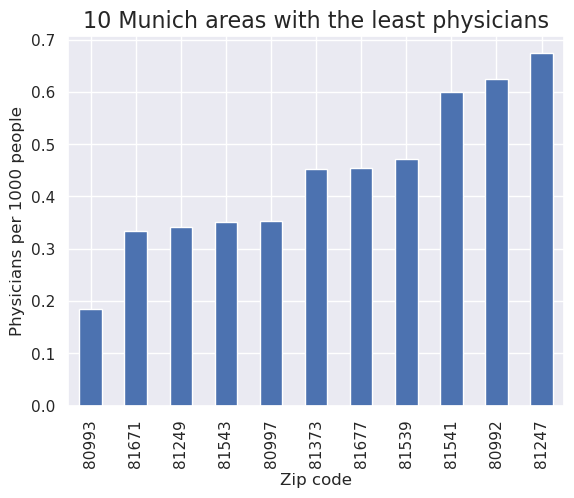

In [4]:
df.loc[:10].plot.bar(x="zipcode", y="physicians_per_1000_people", legend=False)
plt.ylabel("Physicians per 1000 people")
plt.xlabel("Zip code")
plt.title("10 Munich areas with the least physicians", fontsize=16);

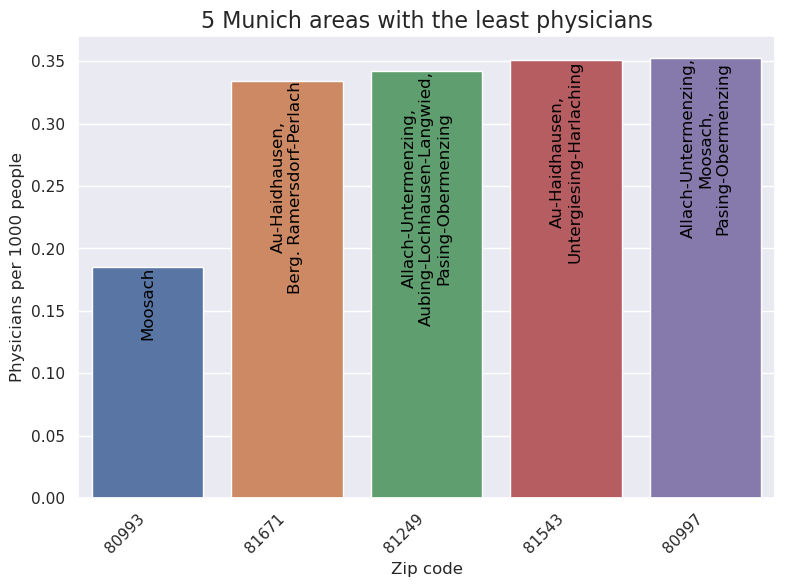

In [5]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=FutureWarning)

    n=5
    fig, ax = plt.subplots(figsize=(9, 6))
    ax = sns.barplot(x='zipcode', y='physicians_per_1000_people', data=df.loc[:n-1,:], order=df.loc[:n-1,:]['zipcode']);

    # Add text labels inside the bars
    custom_labels = ['Moosach', 
                     'Au-Haidhausen,\nBerg. Ramersdorf-Perlach',
                     'Allach-Untermenzing,\nAubing-Lochhausen-Langwied,\nPasing-Obermenzing',
                     'Au-Haidhausen,\nUntergiesing-Harlaching',
                     'Allach-Untermenzing,\nMoosach,\nPasing-Obermenzing']
    for p, label in zip(ax.patches, custom_labels):
        ax.text(p.get_x() + p.get_width() / 2.,
                p.get_height(),
                label,  # Use the custom label from the list
                ha='center',
                va='top',
                rotation=90,  # Rotate the text vertically
                color='black',  # Color of the text
                #fontweight='bold',  # Font weight of the text
                size=12)  # Font size of the text

    # Set axis labels and title
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Physicians per 1000 people')
    plt.xlabel("Zip code")
    plt.title(f"{5} Munich areas with the least physicians", fontsize=16);
    plt.savefig(f"../reports/Bar_{n}_zipcodes_with_the_least_physicians.pdf", bbox_inches="tight")

In [6]:
df.loc[:10]['zipcode'].values

array([80993, 81671, 81249, 81543, 80997, 81373, 81677, 81539, 81541,
       80992, 81247])